### 计算MIOU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import cv2

(36, 64, 3) (36, 64, 3) (36, 64)


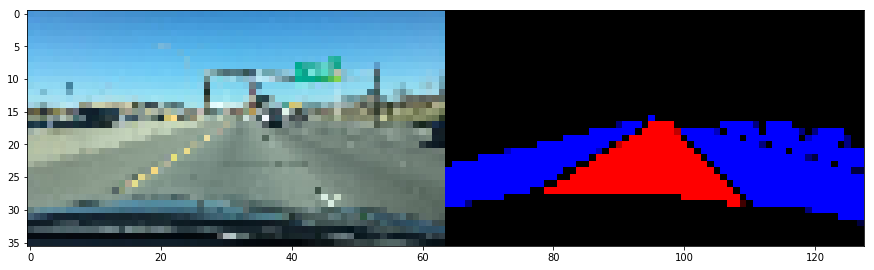

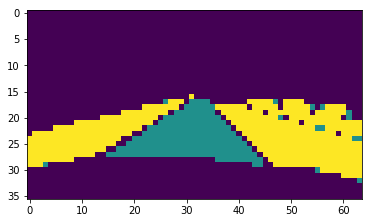

In [2]:
# target
size = (64, 36)
image = cv2.imread("image/1.jpg", -1)
image = cv2.resize(image, size)
colorMap = cv2.imread("image/1_drivable_color.png", -1)
colorMap = cv2.resize(colorMap, size)
target = cv2.imread("image/1_drivable_id.png", -1)
target = cv2.resize(target, size)
print(image.shape, colorMap.shape, target.shape)
show_image = cv2.hconcat([image, colorMap])

figsize = (15,6)
plt.figure(1, figsize=figsize)
plt.imshow(show_image[:,:,::-1])
plt.figure()
plt.imshow(target)
plt.show()

In [3]:
class Evaluator(object):
    def __init__(self, num_class):
        self.num_class = num_class
        self.confusion_matrix = np.zeros((self.num_class,)*2)

    def Pixel_Accuracy(self):
        Acc = np.diag(self.confusion_matrix).sum() / self.confusion_matrix.sum()
        return Acc

    def Pixel_Accuracy_Class(self):
        Acc = np.diag(self.confusion_matrix) / self.confusion_matrix.sum(axis=1)
        Acc = np.nanmean(Acc)
        return Acc

    def Mean_Intersection_over_Union(self):
        MIoU = np.diag(self.confusion_matrix) / (
                    np.sum(self.confusion_matrix, axis=1) + np.sum(self.confusion_matrix, axis=0) -
                    np.diag(self.confusion_matrix))
        print("IoU: ", MIoU)
        MIoU = np.nanmean(MIoU)
        return MIoU

    def Frequency_Weighted_Intersection_over_Union(self):
        freq = np.sum(self.confusion_matrix, axis=1) / np.sum(self.confusion_matrix)
        iu = np.diag(self.confusion_matrix) / (
                    np.sum(self.confusion_matrix, axis=1) + np.sum(self.confusion_matrix, axis=0) -
                    np.diag(self.confusion_matrix))

        FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
        return FWIoU

    def _generate_matrix(self, gt_image, pre_image):
        mask = (gt_image >= 0) & (gt_image < self.num_class)
        label = self.num_class * gt_image[mask].astype('int') + pre_image[mask]
        count = np.bincount(label, minlength=self.num_class**2)
        confusion_matrix = count.reshape(self.num_class, self.num_class)
        return confusion_matrix

    def add_batch(self, gt_image, pre_image):
        assert gt_image.shape == pre_image.shape
        self.confusion_matrix += self._generate_matrix(gt_image, pre_image)

    def reset(self):
        self.confusion_matrix = np.zeros((self.num_class,) * 2)

In [4]:
evaluator = Evaluator(num_class=3)
print(evaluator.confusion_matrix)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


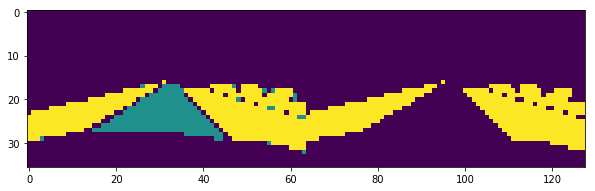

In [5]:
# target 
pred = target.copy()
pred[target == 1] = 0

plt.figure(figsize=(10,3))
plt.imshow(cv2.hconcat([target, pred]))
# print(target[15:30, :])
# print(pred[15:30, :])

In [24]:
target_ = np.expand_dims(target, 0)
target_2 = np.repeat(target_, 2, axis=0)

pred_ = np.expand_dims(pred, 0)
pred_2 = np.repeat(pred_, 2, axis=0)

print(target_2.shape)

# plt.imshow(target_2[0])

evaluator.add_batch(target_2, pred_2)
print(evaluator.confusion_matrix)
MIou = evaluator.Mean_Intersection_over_Union()
print("Miou:", MIou)
evaluator.reset()

(2, 36, 64)
[[3362.    0.    0.]
 [ 400.    0.    0.]
 [   0.    0.  846.]]
IoU:  [0.89367358 0.         1.        ]
Miou: 0.6312245259613681


In [6]:
evaluator.add_batch(target, target)
print(evaluator.confusion_matrix)
MIou = evaluator.Mean_Intersection_over_Union()
print("Miou:", MIou)
evaluator.reset()

[[1681.    0.    0.]
 [   0.  200.    0.]
 [   0.    0.  423.]]
IoU:  [1. 1. 1.]
Miou: 1.0


In [10]:
print(target.shape)

(36, 64)


In [7]:
evaluator.add_batch(target, pred)
print(evaluator.confusion_matrix)
MIou = evaluator.Mean_Intersection_over_Union()
print("Miou:", MIou)
evaluator.reset()

[[1681.    0.    0.]
 [ 200.    0.    0.]
 [   0.    0.  423.]]
IoU:  [0.89367358 0.         1.        ]
Miou: 0.6312245259613681


NameError: name 'target_c' is not defined

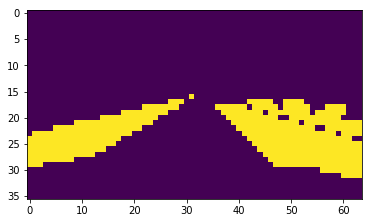

In [9]:
plt.imshow(pred)